## Pairs Trading Assignment (v1.1)
### by Taes Padhihary

Pairs Trading is another trading strategy. Its underlying principle is mean-reversion: the prices of two co-related (and/or co-integrated) stocks move together; if they deviate from the trend, they're expected to return to that trend. If they don't, losses on one will be somewhat compensated by the profits generated by the other.

### Step 1: Selecting the pair

In [1]:
# %pip install niftystocks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from niftystocks import ns

import warnings
warnings.filterwarnings('ignore')

Selecting _pairs_ from the same _sector_ makes some sense, intuitively. Let us understand the pairs trading with the help of IT sector stocks of NIFTY50. We'll select on the basis of the data from 2019-2021 and test on the basis of 2022-till date (?).

In [3]:
start_date = '2019-01-01'
end_date = '2021-12-31'

In [4]:
stocks = ns.get_nifty_it_with_ns()
prices = yf.download(stocks, start = start_date, end = end_date)['Adj Close']

prices.head()

[*********************100%***********************]  10 of 10 completed

2 Failed downloads:
['MINDTREE.NS', 'LTI.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Ticker,COFORGE.NS,HCLTECH.NS,INFY.NS,LTI.NS,MINDTREE.NS,MPHASIS.NS,OFSS.NS,TCS.NS,TECHM.NS,WIPRO.NS
Date,,,,,,,,,,
2019-01-01 00:00:00+00:00,1067.733032,404.406830,567.114014,NaN,NaN,867.911743,2826.397949,1708.359619,600.326111,239.273026
2019-01-02 00:00:00+00:00,1069.402100,398.719025,570.525024,NaN,NaN,853.929871,2812.377930,1726.764893,594.440491,238.467285
2019-01-03 00:00:00+00:00,1050.254639,399.561584,570.610229,NaN,NaN,818.888855,2724.238525,1705.800781,577.076111,238.430649
2019-01-04 00:00:00+00:00,1041.028076,392.820435,563.703064,NaN,NaN,803.051392,2726.928955,1685.061523,568.602539,237.661530
2019-01-07 00:00:00+00:00,1058.368164,396.696655,572.784729,NaN,NaN,798.606445,2725.413330,1703.960693,573.945496,237.514999


In [5]:
prices.dropna(axis=1, inplace=True)

prices.head()

Ticker,COFORGE.NS,HCLTECH.NS,INFY.NS,MPHASIS.NS,OFSS.NS,TCS.NS,TECHM.NS,WIPRO.NS
Date,,,,,,,,
2019-01-01 00:00:00+00:00,1067.733032,404.406830,567.114014,867.911743,2826.397949,1708.359619,600.326111,239.273026
2019-01-02 00:00:00+00:00,1069.402100,398.719025,570.525024,853.929871,2812.377930,1726.764893,594.440491,238.467285
2019-01-03 00:00:00+00:00,1050.254639,399.561584,570.610229,818.888855,2724.238525,1705.800781,577.076111,238.430649
2019-01-04 00:00:00+00:00,1041.028076,392.820435,563.703064,803.051392,2726.928955,1685.061523,568.602539,237.661530
2019-01-07 00:00:00+00:00,1058.368164,396.696655,572.784729,798.606445,2725.413330,1703.960693,573.945496,237.514999


##### Correlation

We've simplified the task by focusing only a particular sector of stocks. However, let's run a correlation analysis for these stocks as well.

Ticker      COFORGE.NS  HCLTECH.NS   INFY.NS  MPHASIS.NS   OFSS.NS    TCS.NS  \
Ticker                                                                         
COFORGE.NS    1.000000    0.949181  0.967860    0.984718  0.879061  0.941630   
HCLTECH.NS    0.949181    1.000000  0.983262    0.943671  0.822024  0.986252   
INFY.NS       0.967860    0.983262  1.000000    0.959792  0.846067  0.981927   
MPHASIS.NS    0.984718    0.943671  0.959792    1.000000  0.906359  0.934480   
OFSS.NS       0.879061    0.822024  0.846067    0.906359  1.000000  0.832293   
TCS.NS        0.941630    0.986252  0.981927    0.934480  0.832293  1.000000   
TECHM.NS      0.955039    0.921558  0.931589    0.969133  0.884239  0.914841   
WIPRO.NS      0.971048    0.951726  0.972855    0.975537  0.913292  0.962829   

Ticker      TECHM.NS  WIPRO.NS  
Ticker                          
COFORGE.NS  0.955039  0.971048  
HCLTECH.NS  0.921558  0.951726  
INFY.NS     0.931589  0.972855  
MPHASIS.NS  0.969133  0.975537  
O

<Axes: xlabel='Ticker', ylabel='Ticker'>

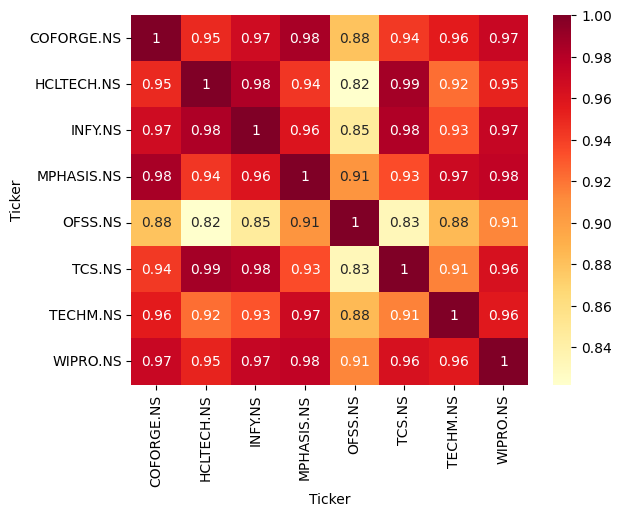

In [6]:
print(prices.corr())

sns.heatmap(prices.corr(), annot = True, cmap ='YlOrRd')

As pretty much expected, the stocks are closely interrelated with the minimum correlation coefficient being around 0.82. However, since we're greedy to select the _best_ pair, we'll filter out the pairs with correlation $\geq 0.9$.

In [7]:
pairs_first_draft = pd.DataFrame(columns=['stock1', 'stock2', 'corr'])
stock1_list, stock2_list, corr_list = [], [], []

for i in range(prices.shape[1]):
    for j in range(i+1, prices.shape[1]):
        check = prices.corr().iat[i,j]
        if (check >= 0.9):
            stock1_list.append(prices.columns[i])
            stock2_list.append(prices.columns[j])
            corr_list.append(check)
            

pairs_first_draft['stock1']=stock1_list
pairs_first_draft['stock2']=stock2_list
pairs_first_draft['corr']=corr_list

pairs_first_draft

,stock1,stock2,corr
0,COFORGE.NS,HCLTECH.NS,0.949181
1,COFORGE.NS,INFY.NS,0.967860
2,COFORGE.NS,MPHASIS.NS,0.984718
3,COFORGE.NS,TCS.NS,0.941630
4,COFORGE.NS,TECHM.NS,0.955039
5,COFORGE.NS,WIPRO.NS,0.971048
6,HCLTECH.NS,INFY.NS,0.983262
7,HCLTECH.NS,MPHASIS.NS,0.943671
8,HCLTECH.NS,TCS.NS,0.986252
9,HCLTECH.NS,TECHM.NS,0.921558


Our desired pair will be one from these only. The next step is figuring out _Cointegration_. Note that taking `log_returns` would've been probably more accurate, but it doesn't make much of the difference anyway, since we've one more filter left.

##### Cointegration

I read somewhere that correlation (somehow) analyzes the relation between _returns_ and cointegration analyzes the relation between _prices_. That was enlightening.

The two-step _Engle & Granger Test_ is a pretty cool test to determine the strength/confidence of cointegration (I think?).

Step-1: Fit the equations.

Step-2: Minimize the spread, so that they appear stationary.


In [8]:
# %pip install statsmodels
# %pip install scipy

from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.stattools import adfuller, coint

We'll select the pair with the smallest $p$-value.

In [9]:
p_value = []

# p-values of the log returns

for i in range(pairs_first_draft.shape[0]):
    s1 = np.log(prices[pairs_first_draft['stock1'][i]])
    s2 = np.log(prices[pairs_first_draft['stock2'][i]])
    check = coint(s1,s2)[1]
    p_value.append(check)

pairs_first_draft['p-val'] = p_value

pairs_second_draft = pairs_first_draft.sort_values(by='p-val', ignore_index=True, ascending=True)

print(pairs_second_draft)

        stock1      stock2      corr     p-val
0      INFY.NS      TCS.NS  0.981927  0.001049
1   HCLTECH.NS      TCS.NS  0.986252  0.020161
2      INFY.NS  MPHASIS.NS  0.959792  0.021541
3   HCLTECH.NS     INFY.NS  0.983262  0.021747
4   COFORGE.NS  MPHASIS.NS  0.984718  0.033539
5       TCS.NS    WIPRO.NS  0.962829  0.051924
6   COFORGE.NS     INFY.NS  0.967860  0.129492
7   MPHASIS.NS      TCS.NS  0.934480  0.136259
8      OFSS.NS    WIPRO.NS  0.913292  0.139937
9   COFORGE.NS      TCS.NS  0.941630  0.225705
10  HCLTECH.NS  MPHASIS.NS  0.943671  0.277068
11  COFORGE.NS  HCLTECH.NS  0.949181  0.292227
12     INFY.NS    WIPRO.NS  0.972855  0.307402
13  MPHASIS.NS    WIPRO.NS  0.975537  0.375594
14  COFORGE.NS    WIPRO.NS  0.971048  0.392314
15      TCS.NS    TECHM.NS  0.914841  0.403989
16  HCLTECH.NS    WIPRO.NS  0.951726  0.430467
17  MPHASIS.NS     OFSS.NS  0.906359  0.433986
18  COFORGE.NS    TECHM.NS  0.955039  0.502664
19  MPHASIS.NS    TECHM.NS  0.969133  0.536199
20  HCLTECH.N

Now, we have the stocks: INFY.NS and TCS.NS. Further work will be done with them.

### Step 2: Analyzing the selected pair

In [10]:
# Regression fit and spread
# y = gamma * x + c + z(spread)
# in v1.0, I used the hedge ratio from the backtest period LOL
# the hedge ratio here is gamma, given by res.params[1]

res = OLS(prices['INFY.NS'], add_constant(prices['TCS.NS'])).fit()
hedge_ratio = res.params[1]

# we proceed to test now using the above hedge ratio
# in a different timeperiod

start_date = '2022-01-01'
end_date = '2024-03-31'

pair = ['INFY.NS', 'TCS.NS']

price_pair = yf.download(pair, start=start_date, end=end_date)['Close']
price_pair.head()

[*********************100%***********************]  2 of 2 completed


Ticker,INFY.NS,TCS.NS
Date,,
2022-01-03 00:00:00+00:00,1898.449951,3817.750000
2022-01-04 00:00:00+00:00,1899.150024,3884.750000
2022-01-05 00:00:00+00:00,1844.650024,3860.949951
2022-01-06 00:00:00+00:00,1817.800049,3807.449951
2022-01-07 00:00:00+00:00,1814.300049,3853.500000


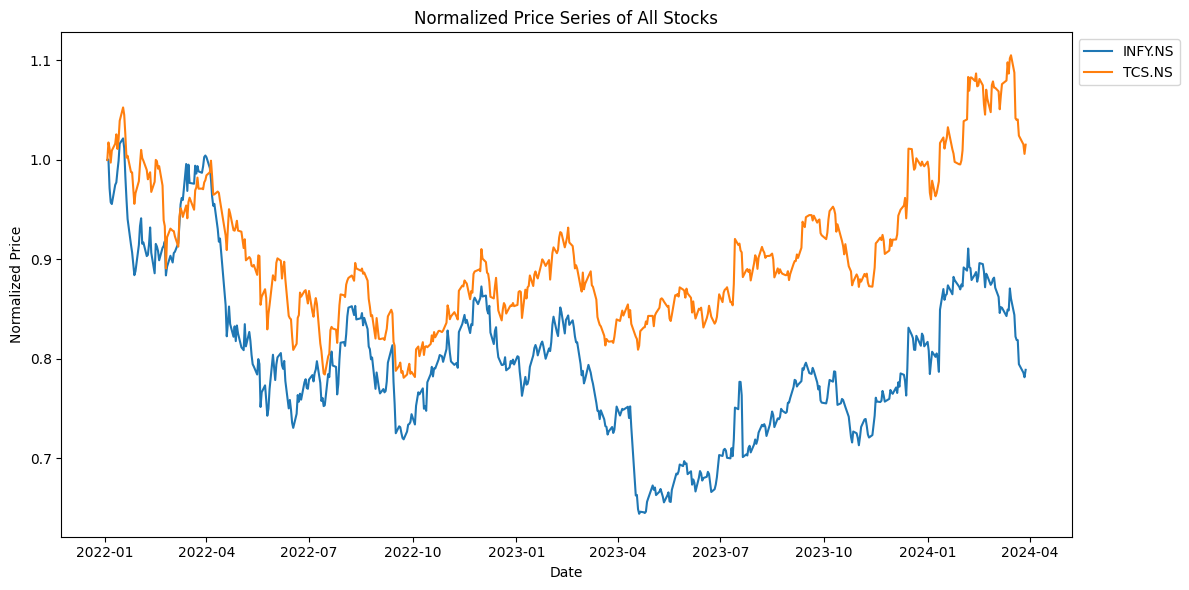

In [11]:
plt.figure(figsize=(12,6))
sns.lineplot(price_pair/price_pair.iloc[0], dashes=False)
plt.title('Normalized Price Series of All Stocks')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

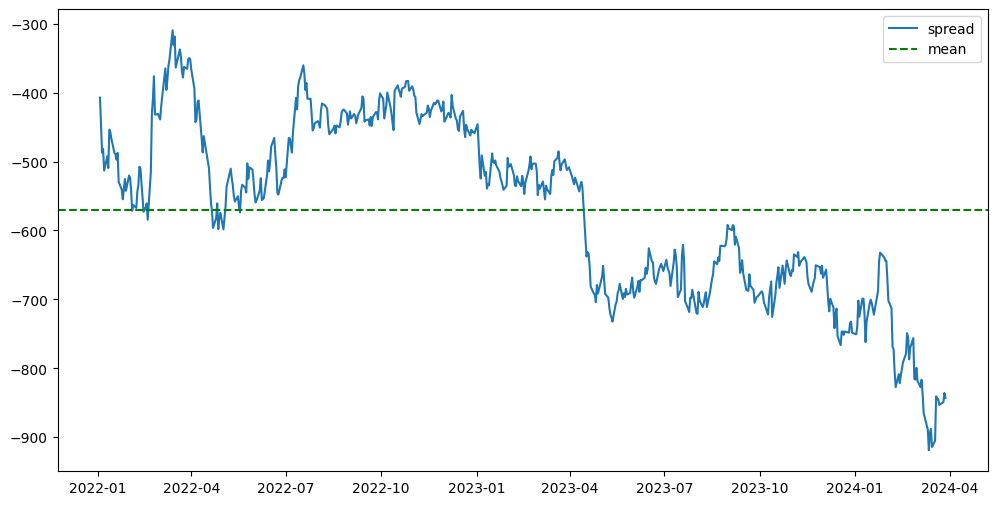

In [12]:
spread = price_pair['INFY.NS'] - hedge_ratio*price_pair['TCS.NS']

plt.figure(figsize=(12,6))
plt.plot(spread, label='spread')
plt.axhline(y=spread.mean(), color='green', linestyle='dashed', label='mean')
plt.legend()

(Personal remark: Weird, they don't look _that_ correlated/cointegrated.)

##### Z-score

The z-score of a distribution $$z = \frac{x - \mu}{\sigma}$$ is a very important indicator of its spread.

Generate price_pair for atypical values of z-score. (I'll use bollinger bands in future versions, no time now).

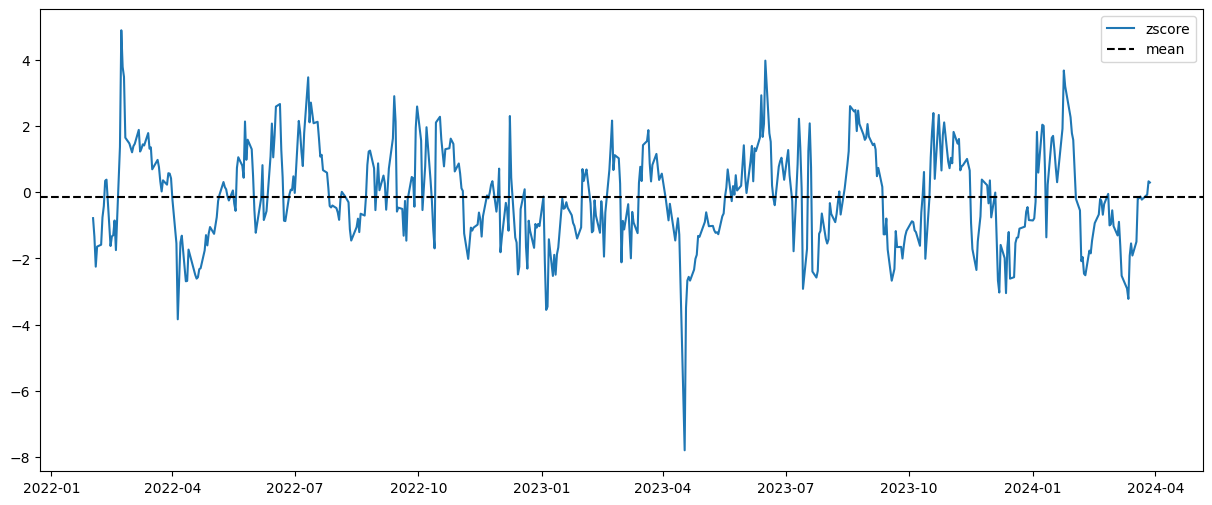

In [13]:
window = 20 # 20-day rolling mean of zscore
zscore = []
for i in range(window, len(spread)):
    calc = spread[i-window:i]
    zscore.append((spread[i]-calc.mean())/calc.std())
zscore = pd.Series(zscore, index = spread.index[window:])

plt.figure(figsize=(15,6))
plt.plot(zscore, label='zscore')
plt.axhline(y=zscore.mean(), color='black', linestyle='dashed', label='mean')
plt.legend()

I'm speechless after seeing the graph. But, following is the formality, named as strategy (just for completion).

### Step 3: Strategy and Backtesting

Set the threshold at z-score equal to 1. If zscore > 1 then buy INFY and sell TCS. If zscore < -1 then buy TCS and sell INFY.

In [14]:
price_pair['zscore'] = zscore

price_pair['signal'] = np.select([price_pair['zscore'] > 1, price_pair['zscore'] < -1], [1, -1], default=0) 
# signal generation based on the z-score

price_pair.loc[abs(price_pair['zscore']) > 2, 'signal'] = 0 # stop-loss

price_pair['pos_1'] = -price_pair['signal'].diff()
price_pair['pos_2'] = -price_pair['pos_1']

price_pair.head(33)

Ticker,INFY.NS,TCS.NS,zscore,signal,pos_1,pos_2
Date,,,,,,
2022-01-03 00:00:00+00:00,1898.449951,3817.750000,NaN,0,NaN,NaN
2022-01-04 00:00:00+00:00,1899.150024,3884.750000,NaN,0,-0.0,0.0
2022-01-05 00:00:00+00:00,1844.650024,3860.949951,NaN,0,-0.0,0.0
2022-01-06 00:00:00+00:00,1817.800049,3807.449951,NaN,0,-0.0,0.0
2022-01-07 00:00:00+00:00,1814.300049,3853.500000,NaN,0,-0.0,0.0
2022-01-10 00:00:00+00:00,1850.750000,3879.850098,NaN,0,-0.0,0.0
2022-01-11 00:00:00+00:00,1855.599976,3915.899902,NaN,0,-0.0,0.0
2022-01-12 00:00:00+00:00,1877.449951,3859.899902,NaN,0,-0.0,0.0
2022-01-13 00:00:00+00:00,1896.800049,3897.899902,NaN,0,-0.0,0.0


Fill the na values with 0. And, now comes the backtesting period. Recall that $$\text{(INFY.NS)} \approx \texttt{hedge\_ratio}\cdot \text{(TCS.NS)}$$ where we did a lot of notation abuse and used the hedge ratio (evaluated during the analysis period of 2017-2020) from above. So, let us divide our pft in the similar ratio as well.

In [15]:
investment = 100000
capital_two = investment/(1+hedge_ratio)
capital_one = hedge_ratio*capital_two

share_one = capital_one//(price_pair['INFY.NS'].iloc[0])
share_two = capital_two//(price_pair['TCS.NS'].iloc[0])
    

pft = pd.DataFrame() # portfolio
pft['ret_1'] = price_pair['INFY.NS'].pct_change()*price_pair['signal']*share_one*100
pft['net_1'] = capital_one + pft['ret_1'].cumsum()

pft['ret_2'] = price_pair['TCS.NS'].pct_change()*price_pair['signal']*share_two*100
pft['net_2'] = capital_two + pft['ret_2'].cumsum()


pft['net'] = pft['net_1'] + pft['net_2']

In [16]:
# %pip install quantstats
import quantstats

print(f"Net profit: {100*(pft['net'].iloc[-1]/investment-1)} %")
print(f"Maximum drawdown: {quantstats.stats.max_drawdown(pft['net'])*100} %")
print(f"Sharpe ratio: {quantstats.stats.sharpe(pft['net'])}")

Net profit: 0.5399024836505673 %
Maximum drawdown: -0.30520558213987803 %
Sharpe ratio: 0.6236959669599424


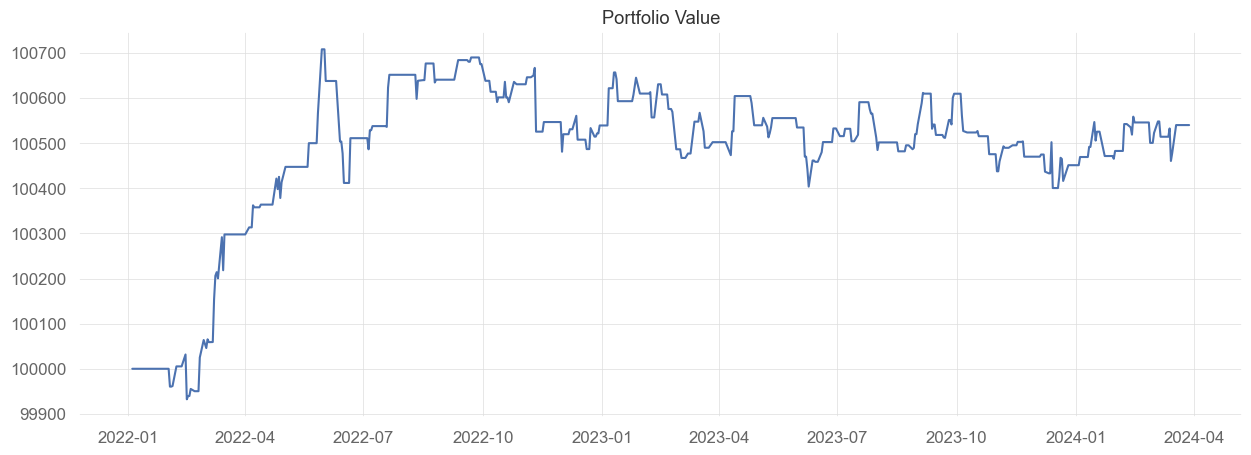

In [17]:
plt.figure(figsize=(15,5))
plt.title("Portfolio Value")
plt.plot(pft['net'])
plt.show()

The profit generated ~~was just 3.75%~~ is 0.54%. It will take an eternity to double the investment, it seems.